# Week5_Preetham_210968190

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Question 1
# Define the parameters for generating time series data
## A) Create a dataset of 10,000 samples with 51 time steps each (Note: the 51st time step should be used as the label)

In [3]:
sample_size = 10000
n_steps = 51

## Function to generate time series data

In [4]:
def generate_time_series(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

### Generate the time series data

In [5]:
series_data = generate_time_series(sample_size, n_steps)
X = series_data[:, :n_steps-1, :]  # Input features (first 50 time steps)
y = series_data[:, -1, :]  # Labels (51st time step)

## B) Split the dataset in the ratio training: validation: testing = 70:20:10.

In [6]:
# Step 2: Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

## C) Design, train, test and compare the performances of the following on the prediction of the value of 51st time step in the generated time series.

## Fully connected neural network

In [7]:
#Step 3: Design and train various models
# a. Fully connected neural network
fc_model = Sequential([
    tf.keras.layers.Flatten(input_shape=(n_steps-1, 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

### Simple RNN model with 1 unit

In [8]:
rnn1_model = Sequential([
    SimpleRNN(1, input_shape=(n_steps-1, 1)),
    Dense(1)
])

### Simple RNN model with 32 units and 1 output unit

In [9]:
rnn2_model = Sequential([
    SimpleRNN(32, input_shape=(n_steps-1, 1), return_sequences=True),
    SimpleRNN(1),
    Dense(1)
])

### Simple RNN model with 32 units, 1 output unit, and return sequences

In [10]:
rnn3_model = Sequential([
    SimpleRNN(32, input_shape=(n_steps-1, 1), return_sequences=True),
    SimpleRNN(1),
    Dense(1)
])

### Simple RNN model with multiple layers

In [11]:
rnn4_model = Sequential([
    SimpleRNN(32, input_shape=(n_steps-1, 1), return_sequences=True),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(1),
    Dense(1)
])

### Loop through each model and train them

In [12]:
for model, model_name in [(fc_model, 'Fully Connected NN'), 
                          (rnn1_model, 'Simple RNN 1'),
                          (rnn2_model, 'Simple RNN 2'), 
                          (rnn3_model, 'Simple RNN 3'),
                          (rnn4_model, 'Simple RNN 4')]:
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
    
    # Evaluate the model on the test data
    test_loss = model.evaluate(X_test, y_test)
    
    # Print the test loss
    print(f"Test Loss for {model_name}: {test_loss}")


Epoch 1/10
219/219 [==============================] - 0s 936us/step - loss: 0.0483 - val_loss: 0.0150
Epoch 2/10
219/219 [==============================] - 0s 596us/step - loss: 0.0108 - val_loss: 0.0085
Epoch 3/10
219/219 [==============================] - 0s 648us/step - loss: 0.0066 - val_loss: 0.0056
Epoch 4/10
219/219 [==============================] - 0s 595us/step - loss: 0.0050 - val_loss: 0.0049
Epoch 5/10
219/219 [==============================] - 0s 589us/step - loss: 0.0044 - val_loss: 0.0045
Epoch 6/10
219/219 [==============================] - 0s 588us/step - loss: 0.0041 - val_loss: 0.0044
Epoch 7/10
219/219 [==============================] - 0s 586us/step - loss: 0.0039 - val_loss: 0.0039
Epoch 8/10
219/219 [==============================] - 0s 600us/step - loss: 0.0036 - val_loss: 0.0040
Epoch 9/10
219/219 [==============================] - 0s 635us/step - loss: 0.0035 - val_loss: 0.0038
Epoch 10/10
31/31 [==============================] - 0s 412us/step - loss: 0.0034


### Test losses for all models

In [24]:
#Test Losses:
#Model               Test Loss      
#Fully Connected NN  0.002751793246716261
#imple RNN 1        0.011672851629555225
#Simple RNN 2        0.0033993739634752274
#Simple RNN 3        0.003061196068301797
#Simple RNN 4        0.003009204287081957

# Q2) Consider the Google Stock Prediction dataset.

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Load the dataset

In [15]:
data = pd.read_csv('GOOG.csv')  

In [17]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [18]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

###  Split data into training (up to 2019) and testing (2020 and 2021) sets

In [19]:
train_data = data[data.index.year < 2020]
test_data = data[(data.index.year >= 2020) & (data.index.year <= 2021)]

In [20]:
train_close = train_data['close'].values
test_close = test_data['close'].values

### Normalize the data (Min-Max scaling)

In [21]:
scaler = MinMaxScaler()
train_close = scaler.fit_transform(train_close.reshape(-1, 1))
test_close = scaler.transform(test_close.reshape(-1, 1))

### sequences for RNN 

In [22]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [23]:
seq_length = 10  # You can adjust this sequence length
X_train = create_sequences(train_close, seq_length)
X_test = create_sequences(test_close, seq_length)
y_train = train_close[seq_length:]
y_test = test_close[seq_length:]

### B. Build the RNN Model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(1)
])

###  C. Compile and Train the Model

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
23/23 - 2s - loss: 0.2054 - val_loss: 0.0090 - 2s/epoch - 71ms/step
Epoch 2/50
23/23 - 0s - loss: 0.0087 - val_loss: 0.0075 - 128ms/epoch - 6ms/step
Epoch 3/50
23/23 - 0s - loss: 0.0027 - val_loss: 0.0067 - 126ms/epoch - 5ms/step
Epoch 4/50
23/23 - 0s - loss: 0.0016 - val_loss: 0.0048 - 129ms/epoch - 6ms/step
Epoch 5/50
23/23 - 0s - loss: 0.0014 - val_loss: 0.0055 - 150ms/epoch - 7ms/step
Epoch 6/50
23/23 - 0s - loss: 0.0014 - val_loss: 0.0024 - 149ms/epoch - 6ms/step
Epoch 7/50
23/23 - 0s - loss: 0.0016 - val_loss: 0.0023 - 148ms/epoch - 6ms/step
Epoch 8/50
23/23 - 0s - loss: 0.0015 - val_loss: 0.0023 - 151ms/epoch - 7ms/step
Epoch 9/50
23/23 - 0s - loss: 0.0013 - val_loss: 0.0080 - 154ms/epoch - 7ms/step
Epoch 10/50
23/23 - 0s - loss: 0.0020 - val_loss: 0.0021 - 151ms/epoch - 7ms/step
Epoch 11/50
23/23 - 0s - loss: 0.0011 - val_loss: 0.0054 - 161ms/epoch - 7ms/step
Epoch 12/50
23/23 - 0s - loss: 0.0015 - val_loss: 0.0019 - 148ms/epoch - 6ms/step
Epoch 13/50
23/23 - 0s - lo

### D. Make Predictions and Evaluate

In [26]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

12/12 [==============================] - 0s 2ms/step


In [27]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mape = mean_absolute_percentage_error(y_test_actual, y_pred)
print(f'MAPE: {mape:.2f}%')

MAPE: 13.35%


In [29]:
# Calculate MSE
mse = mean_squared_error(y_test_actual, y_pred)
print(f'MSE: {mse:.2f}')

MSE: 123808.39


###  Plot actual vs. predicted values

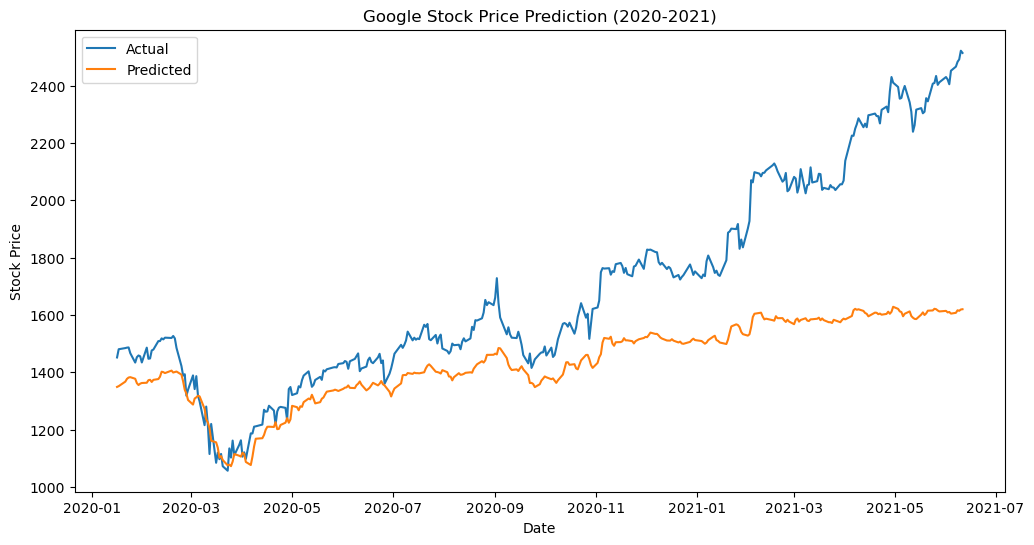

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length:], y_test_actual, label='Actual')
plt.plot(test_data.index[seq_length:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction (2020-2021)')
plt.legend()
plt.show()

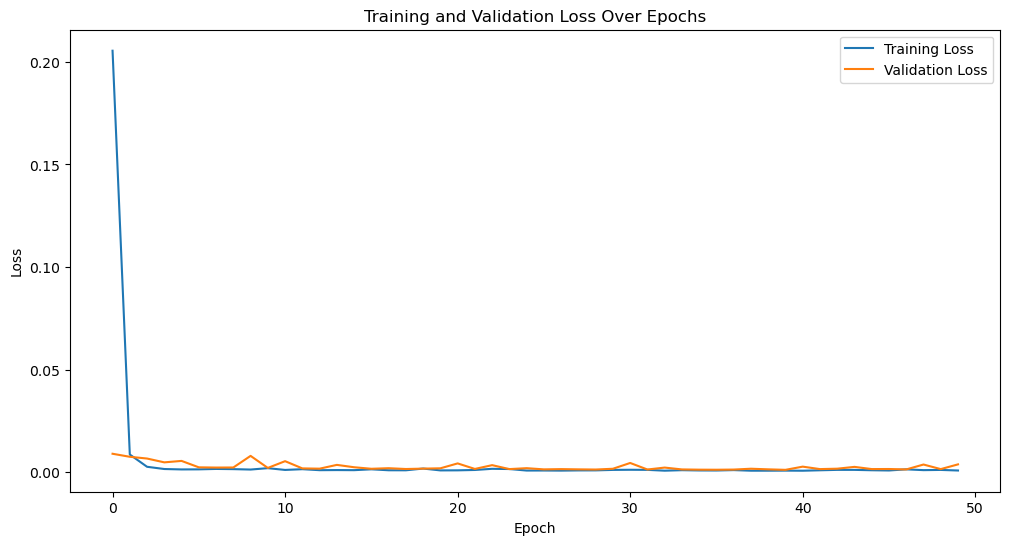

In [36]:
# Plot 2: Training and Validation Loss Over Epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

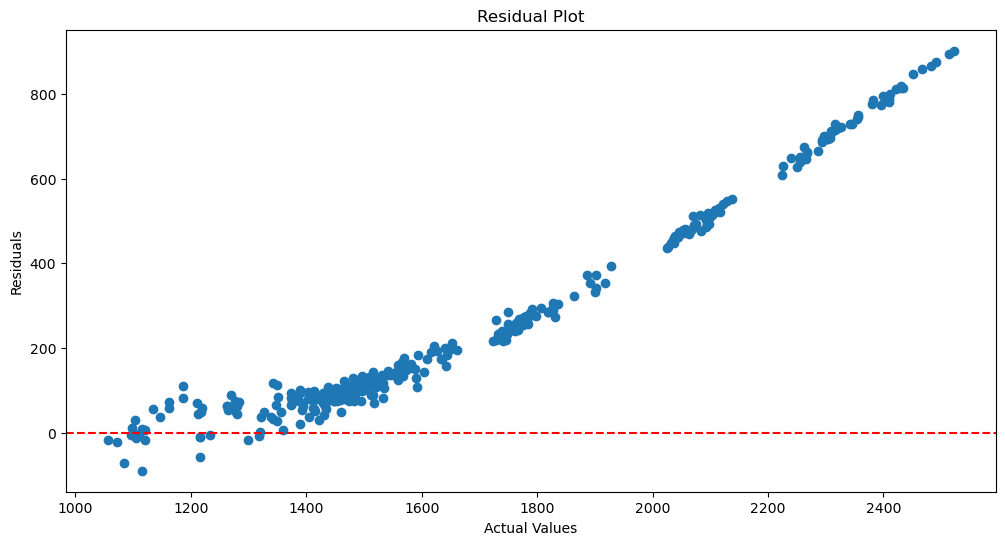

In [35]:
residuals = y_test_actual - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test_actual, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()